# Data Exploration

In [2]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install hf_xet

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [5]:
from datasets import load_dataset

dataset = load_dataset("google/civil_comments")

In [6]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit'],
        num_rows: 1804874
    })
    validation: Dataset({
        features: ['text', 'toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit'],
        num_rows: 97320
    })
    test: Dataset({
        features: ['text', 'toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit'],
        num_rows: 97320
    })
})


In [7]:
print("Number of observations in training data:",len(dataset["train"]),"\n")
print("Number of observations in test data:",len(dataset["test"]),"\n")
print("Number of observations in validation data:", len(dataset["validation"]), "\n")
print("Total number of observations:", len(dataset["train"]) + len(dataset["test"]) + len(dataset["validation"]),"\n")

Number of observations in training data: 1804874 

Number of observations in test data: 97320 

Number of observations in validation data: 97320 

Total number of observations: 1999514 



From the entire dataset, we have a total of __1,999,514__ observations.
We will edit our train dataset however

In [8]:
df_train = dataset["train"].to_pandas()

In [9]:
features = df_train.columns.tolist()

In [10]:
print(features, "\n")

['text', 'toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit'] 



### There are a total of __8__ features in this dataset.

### text, toxicity, severe_toxicity, obscene, threat, insult, identity_attack, sexual_explicit


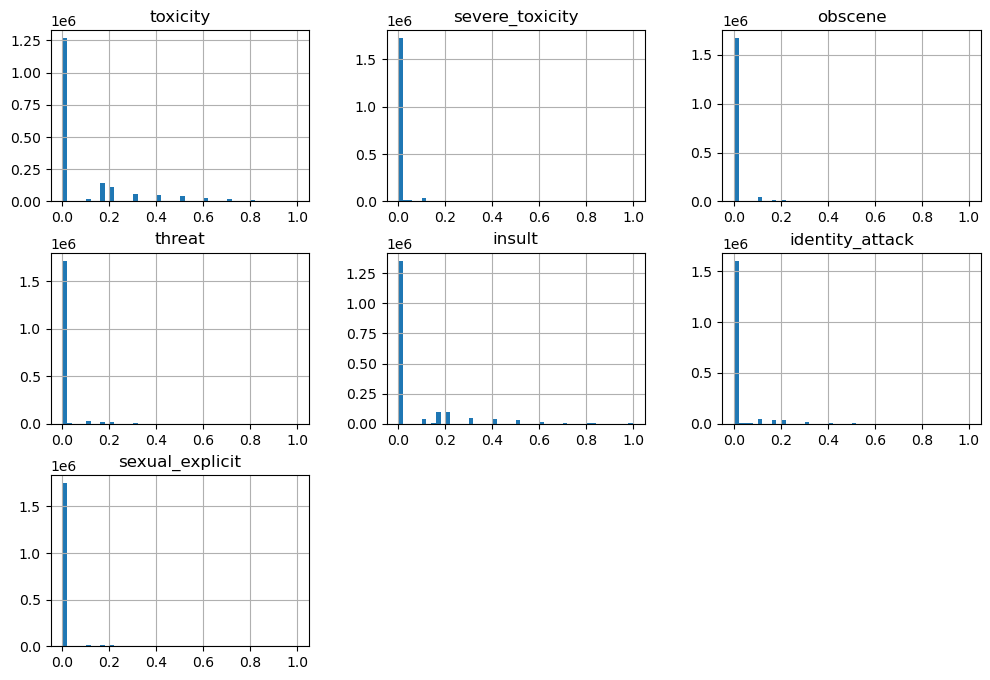

In [11]:
df_train[features].hist(bins=50, figsize=(12,8))
plt.show()

In [12]:
df_train[features].describe()

,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,sexual_explicit
count,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06
mean,1.030173e-01,4.582100e-03,1.387721e-02,9.311274e-03,8.115274e-02,2.263572e-02,6.605973e-03
std,1.971960e-01,2.270813e-02,6.410343e-02,4.904731e-02,1.767215e-01,7.920368e-02,4.496850e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.090909e-02,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [13]:
df_train.dtypes

text                object
toxicity           float32
severe_toxicity    float32
obscene            float32
threat             float32
insult             float32
identity_attack    float32
sexual_explicit    float32
dtype: object

### FEATURE DESCRIPTIONS 

There is a column labeled _text_ which is of type string. This is the statement which is ranked by the 7 features.

The rest of the features are _toxicity_, _severe_toxicity_, _obscene_, _threat_, _insult_, _identity_attack_, _sexual_explicit_

These features are all of float type. From the histogram's x values we can see that all the values are between a range from 0 to 1.

This means that in each column, the features are assigned a percentage of what people believe that text fits in. 

#### EXTRACTING NULL FEATURES

In [14]:
df_train[features].isnull().sum()

text               0
toxicity           0
severe_toxicity    0
obscene            0
threat             0
insult             0
identity_attack    0
sexual_explicit    0
dtype: int64

There are no null values 

#### EXTRACTING DUPLICATE FEATURES

In [15]:
df_train[features].duplicated().sum()

17955

Number of duplicated observations is 17955. We will drop all these duplicates to avoid future issues. 

In [16]:
df_train = df_train.drop_duplicates(features)

In [17]:
df_train[features].duplicated().sum()

0

Now the number of duplicated observations is 0

### DATA PLOTS

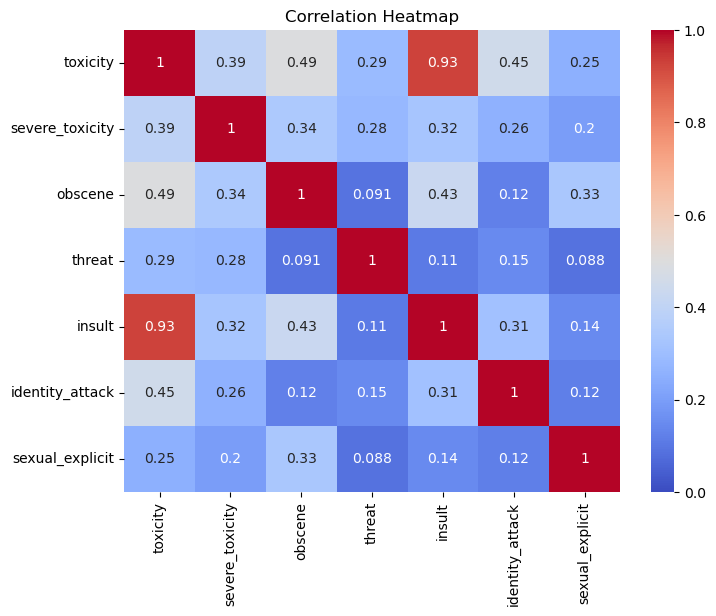

In [25]:
df_train_heatmap = df_train.copy()
df_train_heatmap = df_train_heatmap.drop(columns = ["text"])
plt.figure(figsize=(8,6))
corr = df_train_heatmap.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin = 0, vmax = 1)
plt.title("Correlation Heatmap")
plt.show()

This correlation heatmap tells us that toxicity and insult have a strong correlation. The sexual explicit has the least correlations with the features. This tells us that sexual explicit would not be a good feature to train with. 

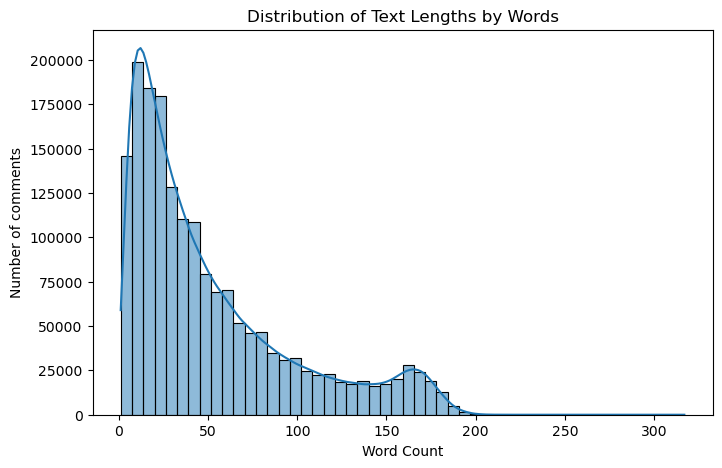

In [37]:
df_train['text_length'] = df_train['text'].str.split().str.len()
plt.figure(figsize = (8,5))
sns.histplot(df_train['text_length'], bins=50, kde = True)
plt.title("Distribution of Text Lengths by Words")
plt.xlabel("Word Count")
plt.ylabel("Number of comments")
plt.show()

In [39]:
print("Mean Word Count is : ", df_train['text_length'].mean(), "\n")
print("Standard Deviation is : ", df_train['text_length'].std())

Mean Word Count is :  51.63763270747023 

Standard Deviation is :  46.15509502960781


This histogram describes the word distribution in the dataset. From this plot, we can see that most of the text